In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observations = 1000

xs = np.random.uniform(-10, 10, (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', input=generated_inputs, targets=generated_targets)

In [3]:
training_data = np.load('TF_intro.npz')

In [15]:
input_size = 2
output_size = 1

# Default
# model = tf.keras.Sequential([
#             tf.keras.layers.Dense(output_size)
#         ])
model = tf.keras.Sequential([
            tf.keras.layers.Dense(output_size,
                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
        ])

# model.compile(optimizer='sgd', loss='mean_squared_error')

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['input'], training_data['targets'] ,epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 35.2697
Epoch 2/100
1000/1000 - 0s - loss: 1.1308
Epoch 3/100
1000/1000 - 0s - loss: 0.4556
Epoch 4/100
1000/1000 - 0s - loss: 0.3764
Epoch 5/100
1000/1000 - 0s - loss: 0.3697
Epoch 6/100
1000/1000 - 0s - loss: 0.3907
Epoch 7/100
1000/1000 - 0s - loss: 0.3759
Epoch 8/100
1000/1000 - 0s - loss: 0.3874
Epoch 9/100
1000/1000 - 0s - loss: 0.3867
Epoch 10/100
1000/1000 - 0s - loss: 0.4110
Epoch 11/100
1000/1000 - 0s - loss: 0.3772
Epoch 12/100
1000/1000 - 0s - loss: 0.3833
Epoch 13/100
1000/1000 - 0s - loss: 0.3657
Epoch 14/100
1000/1000 - 0s - loss: 0.4336
Epoch 15/100
1000/1000 - 0s - loss: 0.3962
Epoch 16/100
1000/1000 - 0s - loss: 0.3879
Epoch 17/100
1000/1000 - 0s - loss: 0.3946
Epoch 18/100
1000/1000 - 0s - loss: 0.4005
Epoch 19/100
1000/1000 - 0s - loss: 0.3685
Epoch 20/100
1000/1000 - 0s - loss: 0.3959
Epoch 21/100
1000/1000 - 0s - loss: 0.3819
Epoch 22/100
1000/1000 - 0s - loss: 0.4070
Epoch 23/100
1000/1000 - 0s - loss: 0.36

In [16]:
## Extract weights and bias
model.layers[0].get_weights()

[array([[ 2.0090103],
        [-3.0411549]], dtype=float32),
 array([4.9880624], dtype=float32)]

In [17]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0090103],
       [-3.0411549]], dtype=float32)

In [18]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9880624], dtype=float32)

In [19]:
## Predictions
model.predict_on_batch(training_data['input'])

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[ 1.78477631e+01],
       [ 8.18849182e+00],
       [-6.75669432e+00],
       [-2.74117985e+01],
       [ 9.40060806e+00],
       [ 2.99284916e+01],
       [-9.47861862e+00],
       [ 4.35650749e+01],
       [-6.97799826e+00],
       [ 1.62777157e+01],
       [ 1.11241388e+00],
       [-4.12830400e+00],
       [-1.82707548e+00],
       [-9.40383148e+00],
       [ 2.75629005e+01],
       [ 3.04959602e+01],
       [ 4.22980309e+01],
       [ 1.46416054e+01],
       [-2.92767124e+01],
       [-1.98562393e+01],
       [ 3.54094849e+01],
       [ 2.62972603e+01],
       [ 6.57846498e+00],
       [-3.66759825e+00],
       [ 2.23477535e+01],
       [-3.80816984e+00],
       [ 2.43968153e+00],
       [ 2.72581983e+00],
       [ 2.00508785e+01],
       [ 2.39257574e+00],
       [ 1.54944916e+01],
       [ 6.59589958e+00],
       [ 2.08070068e+01],
       [-3.53468399e+01],
       [ 4.91527033e+00],
       [ 2.41659603e+01],
       [-3.65

In [20]:
training_data['targets'].round(1)

array([[ 17.6],
       [  8.7],
       [ -6. ],
       [-27.9],
       [  8.7],
       [ 30.2],
       [ -9.5],
       [ 42.2],
       [ -7.3],
       [ 15.6],
       [  1.3],
       [ -3.4],
       [ -1.9],
       [ -9. ],
       [ 27.7],
       [ 30.8],
       [ 42.7],
       [ 14.1],
       [-29. ],
       [-19.5],
       [ 35.5],
       [ 26.2],
       [  6.5],
       [ -2.7],
       [ 21.7],
       [ -3.4],
       [  2.1],
       [  2.9],
       [ 19.2],
       [  3.6],
       [ 15. ],
       [  7. ],
       [ 20.6],
       [-35.9],
       [  4.5],
       [ 23.8],
       [-36. ],
       [-28.5],
       [-16.1],
       [ -1.9],
       [-21.7],
       [ 16.9],
       [ 43.9],
       [ 24.1],
       [ -4.9],
       [ -2.3],
       [ 16.9],
       [ 23.4],
       [-14.7],
       [-36.7],
       [ 36.4],
       [-28.8],
       [ 14.8],
       [ 27.5],
       [ 30. ],
       [  5.1],
       [-29.7],
       [ 37.9],
       [  3.1],
       [ 11.4],
       [ 15.8],
       [ -0.6],
       [

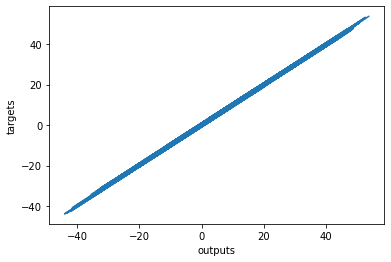

In [21]:
## Compare output and targets

plt.plot(np.squeeze(model.predict_on_batch(training_data['input'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [22]:
## Model with Huber_loss
model_2 = tf.keras.Sequential([
            tf.keras.layers.Dense(output_size,
                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
        ])
model_2.compile(optimizer='sgd', loss='mean_squared_error')
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model_2.compile(optimizer=custom_optimizer, loss='huber_loss')
model_2.fit(training_data['input'], training_data['targets'] ,epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 1s - loss: 11.2787
Epoch 2/100
1000/1000 - 0s - loss: 4.2570
Epoch 3/100
1000/1000 - 0s - loss: 3.3772
Epoch 4/100
1000/1000 - 0s - loss: 2.7170
Epoch 5/100
1000/1000 - 0s - loss: 2.1047
Epoch 6/100
1000/1000 - 0s - loss: 1.5157
Epoch 7/100
1000/1000 - 0s - loss: 0.9730
Epoch 8/100
1000/1000 - 0s - loss: 0.5424
Epoch 9/100
1000/1000 - 0s - loss: 0.3191
Epoch 10/100
1000/1000 - 0s - loss: 0.2206
Epoch 11/100
1000/1000 - 0s - loss: 0.1938
Epoch 12/100
1000/1000 - 0s - loss: 0.1790
Epoch 13/100
1000/1000 - 0s - loss: 0.1777
Epoch 14/100
1000/1000 - 0s - loss: 0.1763
Epoch 15/100
1000/1000 - 0s - loss: 0.1775
Epoch 16/100
1000/1000 - 0s - loss: 0.1745
Epoch 17/100
1000/1000 - 0s - loss: 0.1778
Epoch 18/100
1000/1000 - 0s - loss: 0.1755
Epoch 19/100
1000/1000 - 0s - loss: 0.1771
Epoch 20/100
1000/1000 - 0s - loss: 0.1727
Epoch 21/100
1000/1000 - 0s - loss: 0.1747
Epoch 22/100
1000/1000 - 0s - loss: 0.1757
Epoch 23/100
1000/1000 - 0s - loss: 0.17

In [23]:
model_2.layers[0].get_weights()

[array([[ 2.0381231],
        [-3.0307677]], dtype=float32),
 array([4.998892], dtype=float32)]